In [14]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data_folder = 'data/'
listings_1 = pd.read_csv(data_folder + 'listings.csv')
reviews_1 = pd.read_csv(data_folder + 'reviews.csv')
calendar_1 = pd.read_csv(data_folder + 'calendar.csv')
neighborhoods_1 = pd.read_csv(data_folder + 'neighbourhoods.csv')

listings = listings_1.copy()

height has been deprecated.



In [15]:
# listings.dtypes
listings.loc[0]
# listings.head(2)

id                                                                           20872145
listing_url                                     https://www.airbnb.com/rooms/20872145
scrape_id                                                              20171005235014
last_scraped                                                               2017-10-06
name                                                      Charming Boston Residential
summary                             Berber carpeting. The living room has two full...
space                                                       It's on the second floor.
description                         Berber carpeting. The living room has two full...
experiences_offered                                                              none
neighborhood_overview               Roslindale is an amazing up and coming town in...
notes                                                                             NaN
transit                             Public transportat

In [16]:
# make all numerical data in float
date_columns = ['first_review', 'last_review', 'calendar_last_scraped', 'host_since', 'last_scraped']
for col in date_columns:
    if not is_datetime64_dtype(listings[col]):
        listings[col] = pd.to_datetime(listings[col])
        
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('$', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)

percentage_columns = ['host_response_rate','host_acceptance_rate']
for col in percentage_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('%', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)/100
        
boolean_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification']
for col in boolean_columns:
    for index,value in listings[col].iteritems():
        if listings[col][index]=='t':
            listings.set_value(index, col, 1.0)
        else:
            listings.set_value(index, col, 0.0)
            

In [17]:
# digitize amenities

amenity=listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))
amenity_dic={}
for index,value in amenity.iteritems():
    for item in value:
        if item != '':
            if item in amenity_dic.keys():
                amenity_dic[item]=amenity_dic[item]+1
            else:
                amenity_dic[item]=1


# print(amenity_dic)
sLength=len(listings['id'])
for key in amenity_dic:
#     print(key)
    listings[key] = pd.Series(np.zeros(sLength), index=listings.index)

for index,value in amenity.iteritems():
    for item in value:
        listings.set_value(index, item, 1.0)


In [18]:
# digitize cancelation policy
sLength=len(listings['id'])
cancelation_policy={}
for index,value in listings['cancellation_policy'].iteritems():
    if value in cancelation_policy.keys():
        cancelation_policy[value]=cancelation_policy[value]+1
    else:
        cancelation_policy[value]=1
        
print(cancelation_policy)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['cancellation_policy_num'] = pd.Series(np.zeros(sLength), index=listings.index)
cancelation_policy_convert={'super_strict_60': 0.0,'super_strict_30': 1.0,'strict': 2.0, 'moderate': 3.0,'flexible': 4.0}

# data=listings['cancellation_policy']
# for index,value in data.iteritems():
#     print(value)
for index,value in listings['cancellation_policy'].iteritems():
#     print(value)
    listings.set_value(index, 'cancellation_policy_num', cancelation_policy_convert[value])


{'moderate': 1174, 'flexible': 1145, 'strict': 2505, 'super_strict_30': 44, 'super_strict_60': 2}


In [19]:
# digitize bed type
sLength=len(listings['id'])
bed_type={}
for index,value in listings['bed_type'].iteritems():
    if value in bed_type.keys():
        bed_type[value]=bed_type[value]+1
    else:
        bed_type[value]=1
        
print(bed_type)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['bed_type_num'] = pd.Series(np.zeros(sLength), index=listings.index)
bed_type_convert={'Real Bed': 0, 'Futon': 1, 'Pull-out Sofa': 2, 'Couch': 3, 'Airbed': 4}

# data=listings['cancellation_policy']
# for index,value in data.iteritems():
#     print(value)
for index,value in listings['bed_type'].iteritems():
#     print(value)
    listings.set_value(index, 'bed_type_num', bed_type_convert[value])



{'Futon': 40, 'Couch': 7, 'Real Bed': 4761, 'Airbed': 38, 'Pull-out Sofa': 24}


In [20]:
# digitize room type
sLength=len(listings['id'])
room_type={}
for index,value in listings['room_type'].iteritems():
    if value in room_type.keys():
        room_type[value]=room_type[value]+1
    else:
        room_type[value]=1
        
print(room_type)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['room_type_num'] = pd.Series(np.zeros(sLength), index=listings.index)
room_type_convert={'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2}


for index,value in listings['room_type'].iteritems():
#     print(value)
    listings.set_value(index, 'room_type_num', room_type_convert[value])


{'Entire home/apt': 3031, 'Private room': 1782, 'Shared room': 57}


In [21]:
listings.dtypes

id                                                     int64
listing_url                                           object
scrape_id                                              int64
last_scraped                                  datetime64[ns]
name                                                  object
summary                                               object
space                                                 object
description                                           object
experiences_offered                                   object
neighborhood_overview                                 object
notes                                                 object
transit                                               object
access                                                object
interaction                                           object
house_rules                                           object
thumbnail_url                                         object
medium_url              

In [22]:
# summary_cols = ['beds', 'price', 'review_scores_rating']
# for col in summary_cols:
#     listings[col].describe(percentiles=np.arange(0.1,1,0.1))[3:].plot()
#     plt.title(col)
#     plt.show()


In [23]:
# listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

In [24]:
listings.dtypes
# for amenities in amenity_dic.keys():
#     listings=listings.drop([amenities],axis=1)
listings=listings.drop('',1)
listings=listings.drop('neighbourhood_group_cleansed',1)
listings=listings.drop('square_feet',1)

listings.dtypes

id                                                     int64
listing_url                                           object
scrape_id                                              int64
last_scraped                                  datetime64[ns]
name                                                  object
summary                                               object
space                                                 object
description                                           object
experiences_offered                                   object
neighborhood_overview                                 object
notes                                                 object
transit                                               object
access                                                object
interaction                                           object
house_rules                                           object
thumbnail_url                                         object
medium_url              

In [25]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
# numerical_listings=listings._get_numeric_data()
numerical_listings=listings.select_dtypes(include=['float64'])
print(numerical_listings.dtypes)
# scatter_matrix(numerical_listings)
# plt.show()

host_response_rate                            float64
host_acceptance_rate                          float64
latitude                                      float64
longitude                                     float64
bathrooms                                     float64
bedrooms                                      float64
beds                                          float64
price                                         float64
weekly_price                                  float64
monthly_price                                 float64
security_deposit                              float64
cleaning_fee                                  float64
extra_people                                  float64
review_scores_rating                          float64
review_scores_accuracy                        float64
review_scores_cleanliness                     float64
review_scores_checkin                         float64
review_scores_communication                   float64
review_scores_location      

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


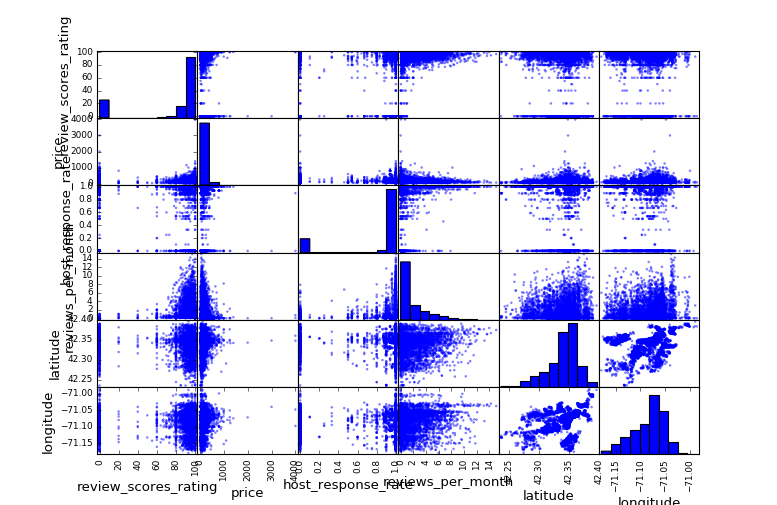

In [26]:
numerical_listings=numerical_listings.fillna(value=0.0)
numerical_listings.loc[1]
data = numerical_listings[['review_scores_rating','price','host_response_rate','reviews_per_month','latitude','longitude']]
# data=numerical_listings['review_scores_rating','price','host_response_rate','reviews_per_month','latitude','longitude']
print(type(data))
data.dtypes
scatter_matrix(data)
plt.show()